In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import csv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_bp=pd.read_excel("D:/x_bp.xlsx", index_col=0)
df_nup=pd.read_excel("D:/x_nup.xlsx", index_col=0)

In [3]:
df=df_bp.join(df_nup, how='inner')

In [4]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [5]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [6]:
df.index

Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,
              ...
              1013.0, 1014.0, 1015.0, 1016.0, 1017.0, 1018.0, 1019.0, 1020.0,
              1021.0, 1022.0],
             dtype='float64', length=1023)

In [7]:
df.index = pd.to_numeric(df.index).astype(int)

In [8]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [9]:
df.shape

(1023, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1018    False
1019    False
1020    False
1021    False
1022    False
Length: 1023, dtype: bool

In [12]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [13]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

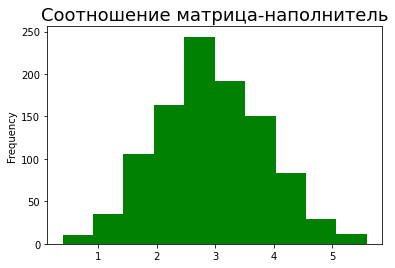

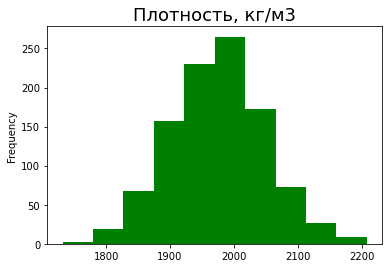

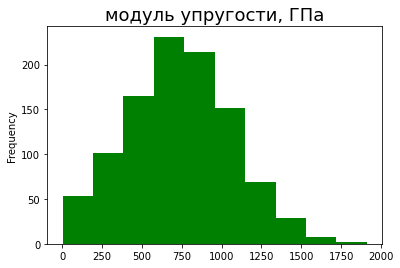

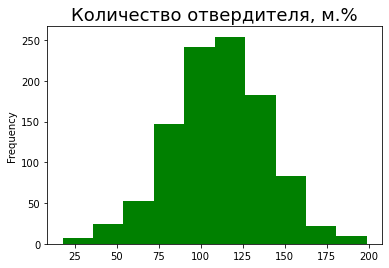

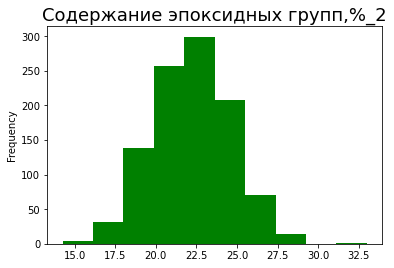

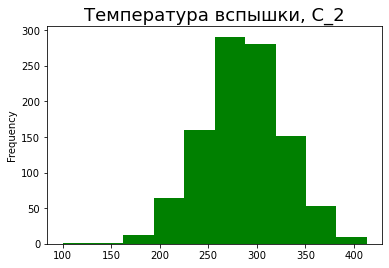

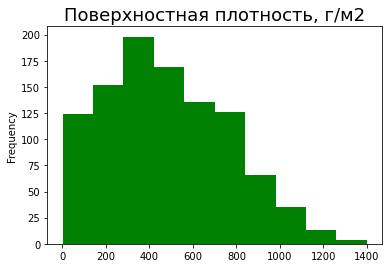

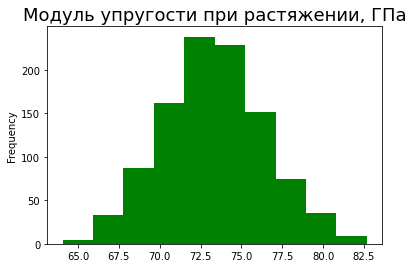

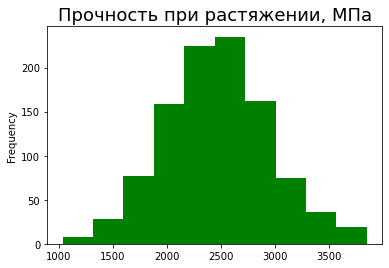

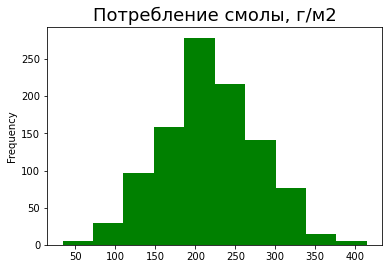

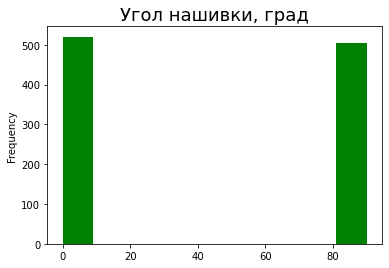

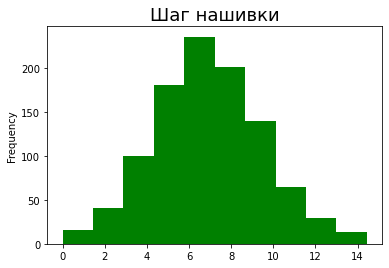

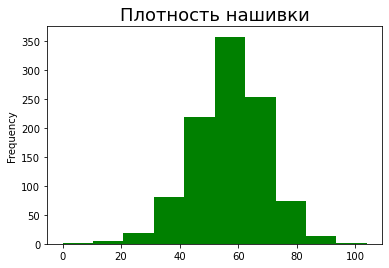

In [14]:
for col in df.columns:
    plt.figure(col)
    plt.title(col, fontsize = 18)
    df[col].plot(kind = 'hist', color='g')

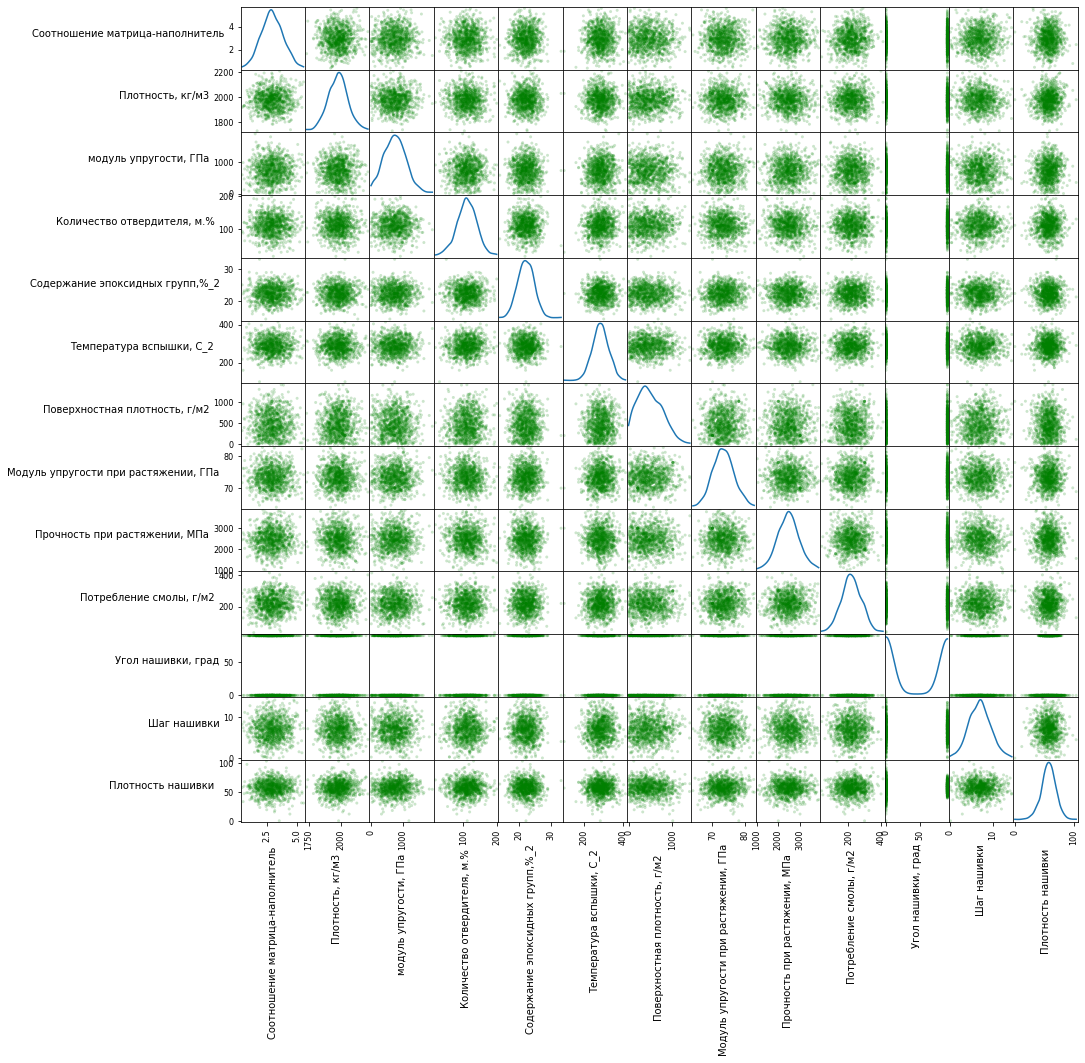

In [15]:
from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(df, color='g', alpha=0.2, figsize=(15, 15), diagonal='kde')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right');

<AxesSubplot:>

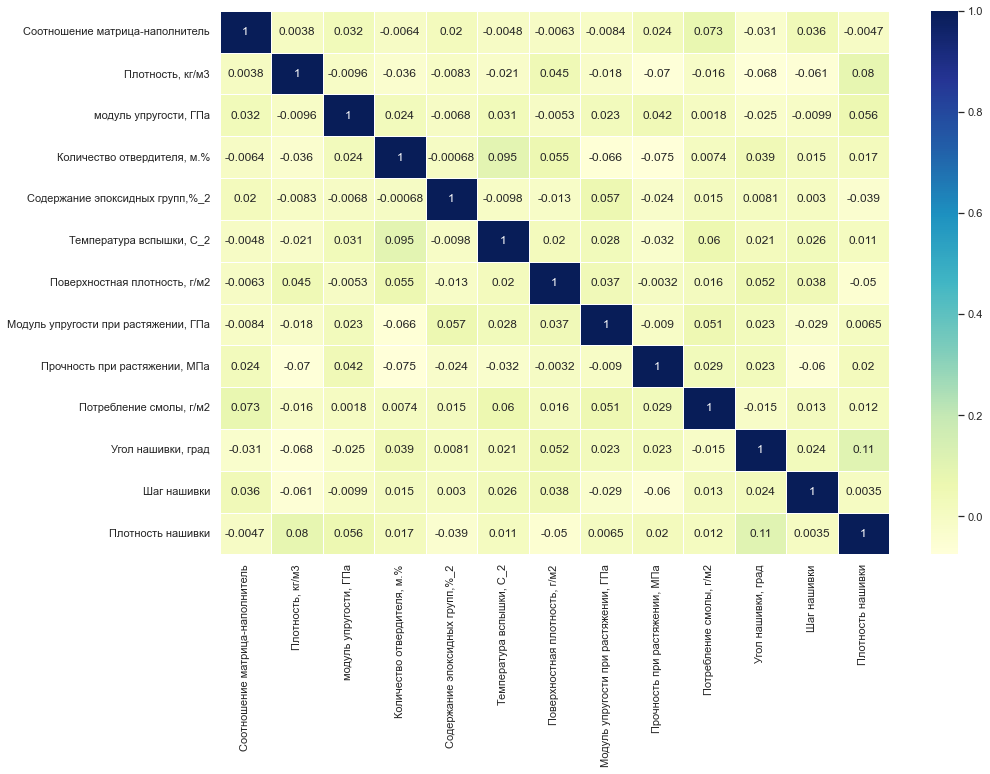

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize = (15, 10))
sns.set_theme()
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

In [17]:
from sklearn.preprocessing import LabelEncoder
df['Угол нашивки, град'] = LabelEncoder().fit_transform(df['Угол нашивки, град'])
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [18]:
df.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,1,6.078902,77.434468


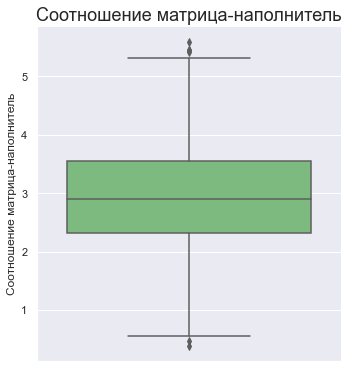

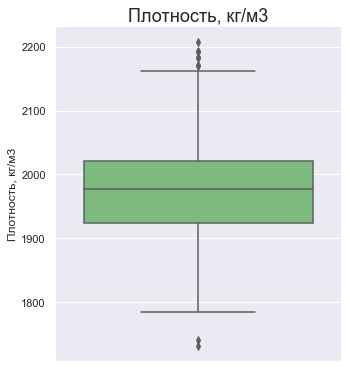

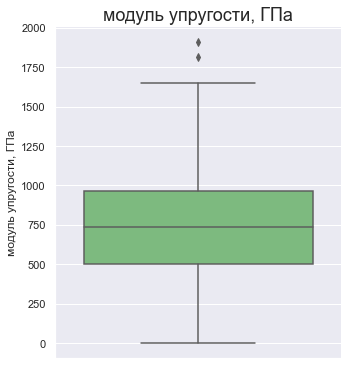

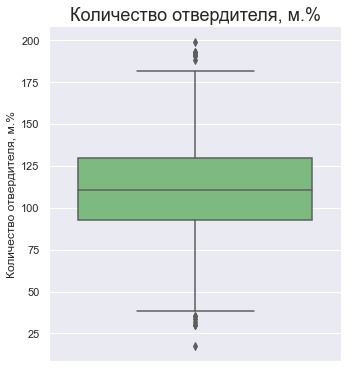

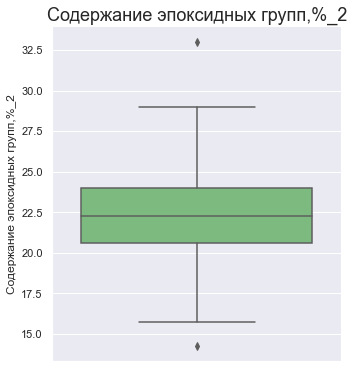

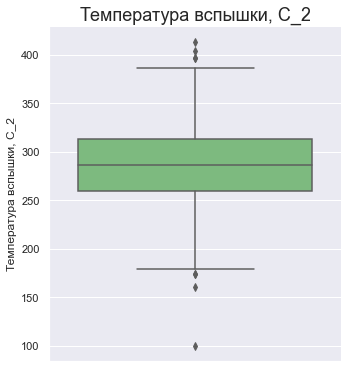

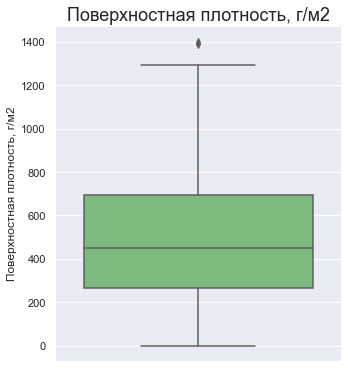

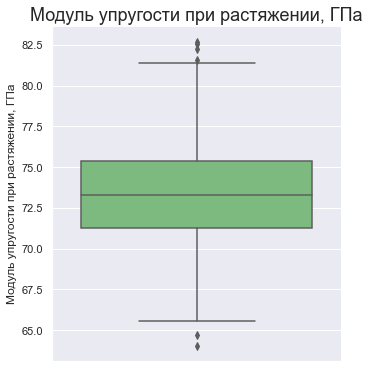

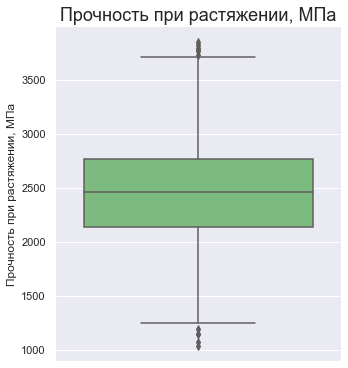

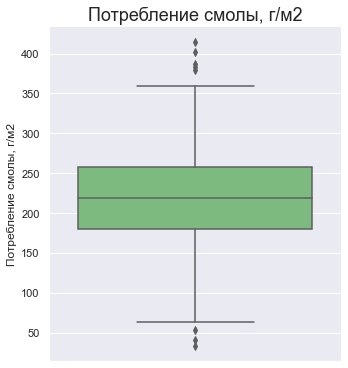

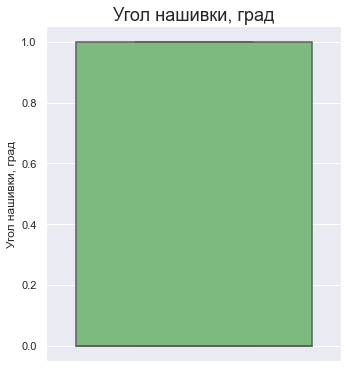

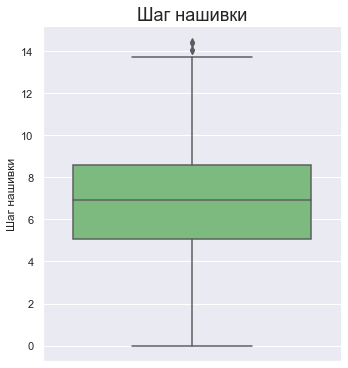

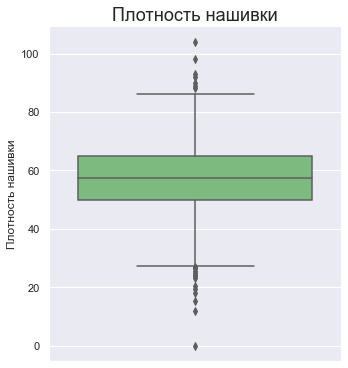

In [19]:
for col in df.columns:
    sns.catplot (y=col, data=df, kind="box", palette='Greens')
    plt.title(col, fontsize=18)

In [20]:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                         0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [21]:
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [22]:
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x]<min,x] = np.nan
    df.loc[df[x]>max,x] = np.nan

In [23]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [24]:
df = df.dropna(axis=0)

In [25]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [26]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1.0,6.313201,58.261074


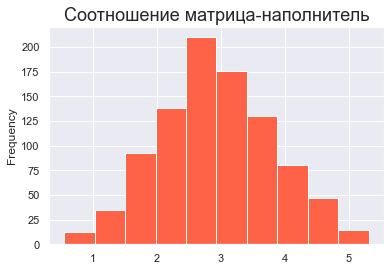

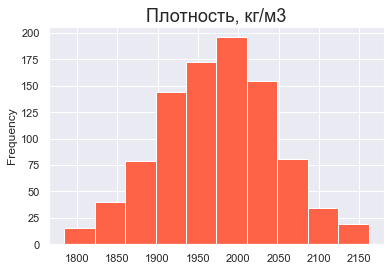

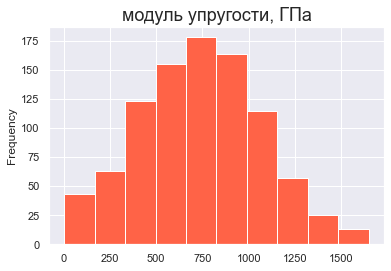

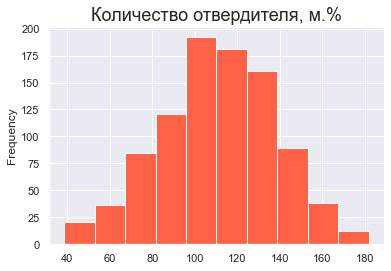

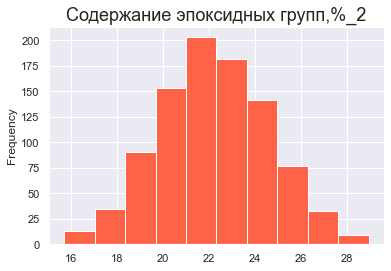

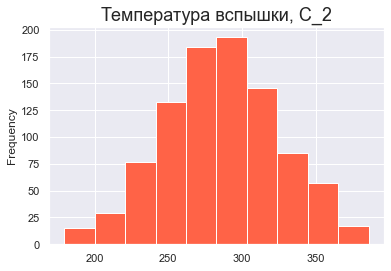

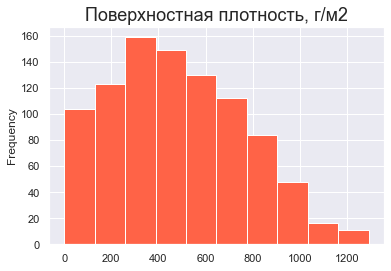

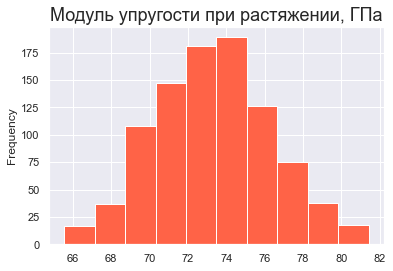

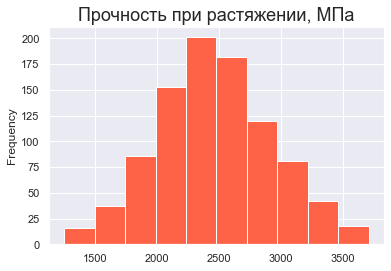

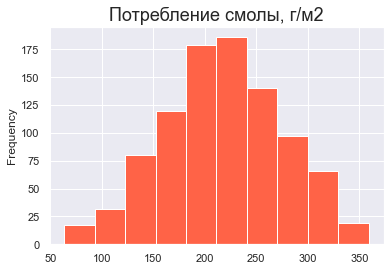

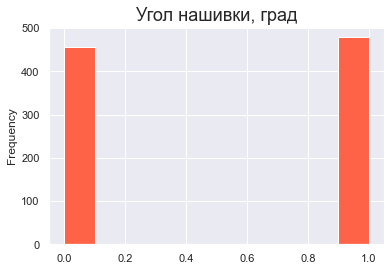

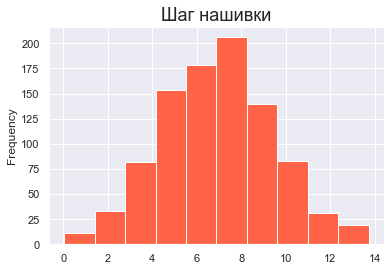

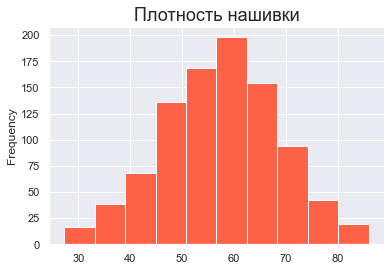

In [27]:
for col in df.columns:
    plt.figure(col)
    plt.title(col, fontsize = 18)
    df[col].plot(kind = 'hist', color='tomato')

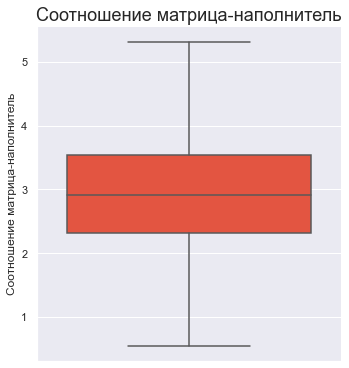

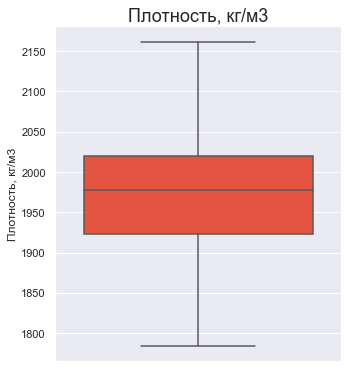

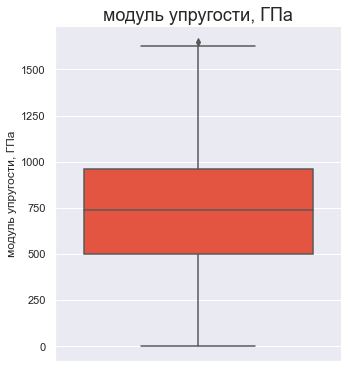

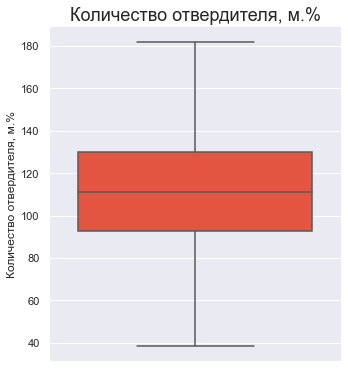

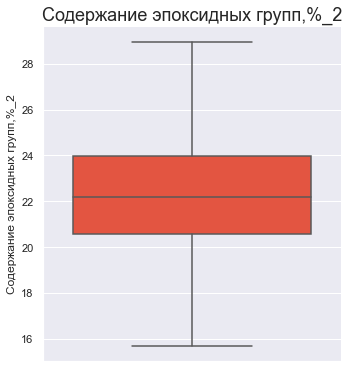

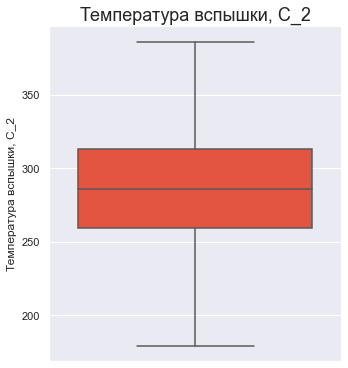

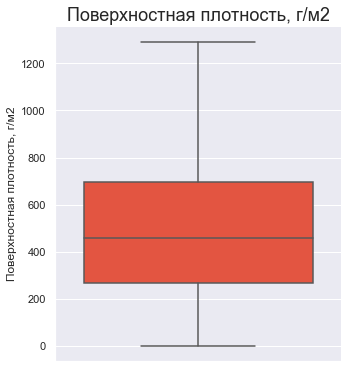

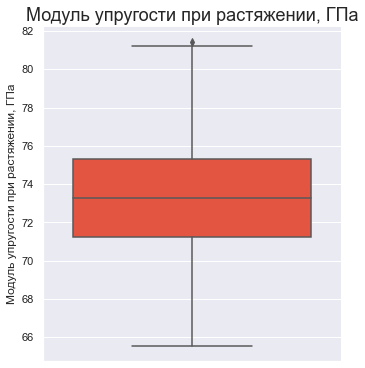

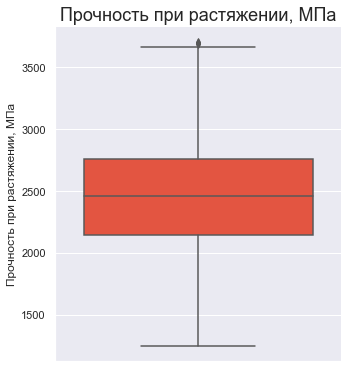

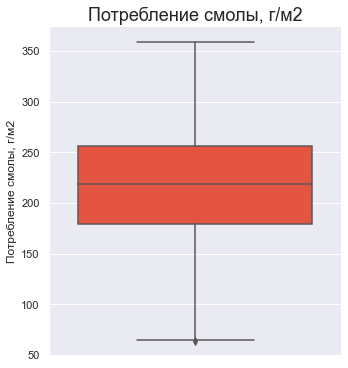

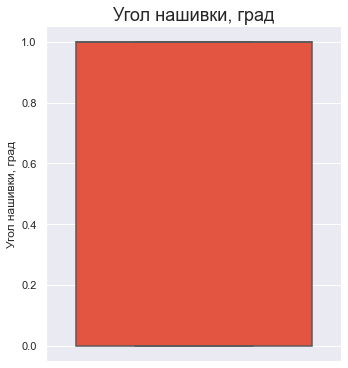

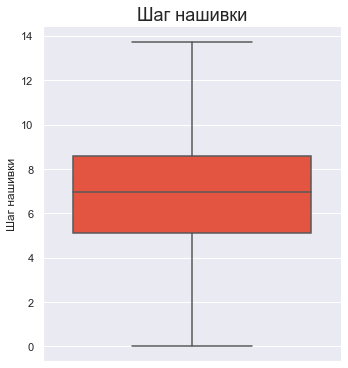

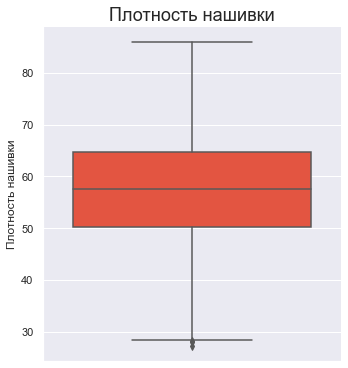

In [28]:
for col in df.columns:
    sns.catplot (y=col, data=df, kind="box", palette='CMRmap')
    plt.title(col, fontsize=18,)

In [29]:
min_max_scaler = MinMaxScaler()
df_n = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [30]:
df_n

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
3,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
4,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
5,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
6,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
1019,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
1020,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
1021,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


In [31]:
df_n_in = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",
                   "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
df_n_out = ["Соотношение матрица-наполнитель",
         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"]

trn = df_n[df_n_in]
trg = df_n[df_n_out]

In [32]:
X_trn, X_test, y_trn, y_test = train_test_split(trn, trg, test_size=0.3, random_state=1)

In [33]:
print("Размер тренировочного датасета на входе:", X_trn.shape)
print("Размер тестового датасета на входе:", X_test.shape)
print("Размер тренировочного датасета на выходе:", y_trn.shape)
print("Размер тестового датасета на выходе:", y_test.shape)

Размер тренировочного датасета на входе: (655, 10)
Размер тестового датасета на входе: (281, 10)
Размер тренировочного датасета на выходе: (655, 3)
Размер тестового датасета на выходе: (281, 3)


In [34]:
models = [LinearRegression(),
RandomForestRegressor(n_estimators=100, max_features ='sqrt'),
KNeighborsRegressor(n_neighbors=10)
]


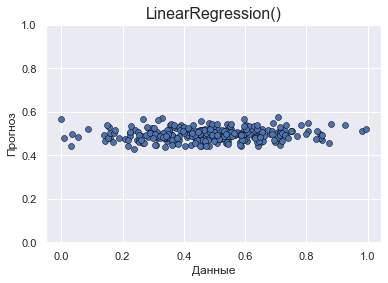

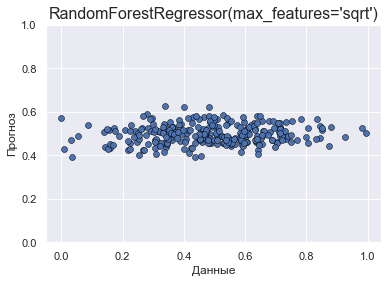

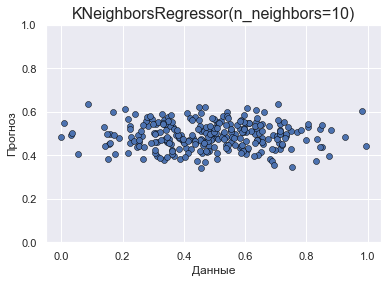

,R2_Y1,R2_Y2,R2_Y3
Model,,,
LinearRegression,-0.025770,-0.018755,-0.004611
RandomForestRegressor,-0.019609,-0.077894,-0.013988
KNeighborsRegressor,-0.085360,-0.081139,-0.120954


In [35]:
models_prov = pd.DataFrame() 
models_results = pd.DataFrame()
tmp = {} 
tmp2 = {}
for model in models:      
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    tmp2['Model'] = m[:m.index('(')]
    
    for i in range(y_trn.shape[1]): 
        model.fit(X_trn, y_trn[df_n_out[i]])  
        tmp['R2_Y%s'%str(i+1)] = r2_score(y_test[df_n_out[i]], model.predict(X_test))
        tmp2 = pd.DataFrame({'Данные': y_test[df_n_out[i]],'Прогноз': model.predict(X_test)})   
        
    models_prov = models_prov.append([tmp]) 
    models_results = tmp2 
    sns.set_style('darkgrid')
    plt.title( model, size=16)
    plt.xlabel('Данные',size=12)
    plt.ylabel('Прогноз',size=12)
    plt.ylim(0, 1)
    sns.scatterplot(x='Данные', y='Прогноз', data=models_results, edgecolor='black', palette='cubehelix')
    plt.show()
    
models_prov.set_index('Model', inplace=True)
models_prov

In [36]:
in_columns = ['Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%',
          'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 
           'Потребление смолы, г/м2', 
          'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
out_columns = ['Соотношение матрица-наполнитель']

trn2 = df_n[in_columns]
trg2 = df_n[out_columns]
trn2.info()
trg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Плотность, кг/м3                 936 non-null    float64
 1   модуль упругости, ГПа            936 non-null    float64
 2   Количество отвердителя, м.%      936 non-null    float64
 3   Содержание эпоксидных групп,%_2  936 non-null    float64
 4   Температура вспышки, С_2         936 non-null    float64
 5   Поверхностная плотность, г/м2    936 non-null    float64
 6   Потребление смолы, г/м2          936 non-null    float64
 7   Угол нашивки, град               936 non-null    float64
 8   Шаг нашивки                      936 non-null    float64
 9   Плотность нашивки                936 non-null    float64
dtypes: float64(10)
memory usage: 80.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 3 columns):
 # 

In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [38]:
normalizer.adapt(np.array(trn2))
print(normalizer.mean.numpy())

[[0.5026951  0.4467639  0.5046643  0.49121633 0.5160587  0.37373248
  0.5211413  0.5117521  0.5022318  0.5137764 ]]


In [39]:
X_trn2, X_test2, y_trn2, y_test2 = train_test_split(trn2, trg2, test_size=0.3)

In [40]:
def build_and_compile_model(norm):
    model2 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.6),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model2.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model2

model2 = build_and_compile_model(normalizer)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [41]:
%%time
history = model2.fit(
    X_trn2,
    y_trn2,
    batch_size = 64,
    epochs=200,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/200
9/9 [==============================] - 1s 36ms/step - loss: 0.5218 - val_loss: 0.2341
Epoch 2/200
9/9 [==============================] - 0s 19ms/step - loss: 0.3087 - val_loss: 0.1989
Epoch 3/200
9/9 [==============================] - 0s 23ms/step - loss: 0.2584 - val_loss: 0.2371
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 0.2331 - val_loss: 0.1907
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2176 - val_loss: 0.1790
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2186 - val_loss: 0.1879
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2073 - val_loss: 0.1671
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2028 - val_loss: 0.1807
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1998 - val_loss: 0.1715
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1923 - val_loss: 0.1606
Epoch 11/200
9/9 [=======

In [42]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [43]:
history.history

{'loss': [0.5217918753623962,
  0.30872079730033875,
  0.2583658695220947,
  0.23305776715278625,
  0.21756918728351593,
  0.21860194206237793,
  0.20731249451637268,
  0.2027817815542221,
  0.19984175264835358,
  0.19231607019901276,
  0.19941343367099762,
  0.1881488710641861,
  0.18464763462543488,
  0.18963104486465454,
  0.18315118551254272,
  0.17995572090148926,
  0.1753208339214325,
  0.1777527779340744,
  0.16433805227279663,
  0.17419174313545227,
  0.16826297342777252,
  0.1681945025920868,
  0.17159272730350494,
  0.17096182703971863,
  0.1638317108154297,
  0.16024664044380188,
  0.16068582236766815,
  0.16559891402721405,
  0.15717478096485138,
  0.16682778298854828,
  0.16333143413066864,
  0.16523396968841553,
  0.1608727127313614,
  0.16211648285388947,
  0.15665467083454132,
  0.15797647833824158,
  0.15463536977767944,
  0.15630118548870087,
  0.16220657527446747,
  0.1546913981437683,
  0.15640714764595032,
  0.15334632992744446,
  0.15259261429309845,
  0.159233734

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.138799,0.148118,195
196,0.139519,0.147652,196
197,0.146106,0.146675,197
198,0.140557,0.145477,198
199,0.137195,0.144668,199


In [45]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('Соотношение матрица-наполнитель ')
    plt.legend()
    plt.grid(True)

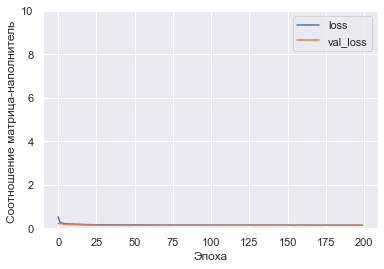

In [46]:
plot_loss(history)

In [47]:
def model_loss_plot(model2):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(15,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

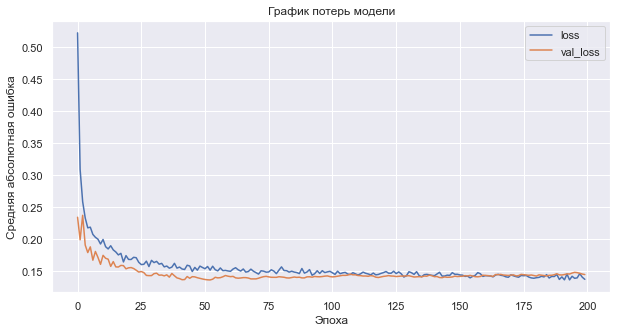

In [48]:
model_loss_plot(history)

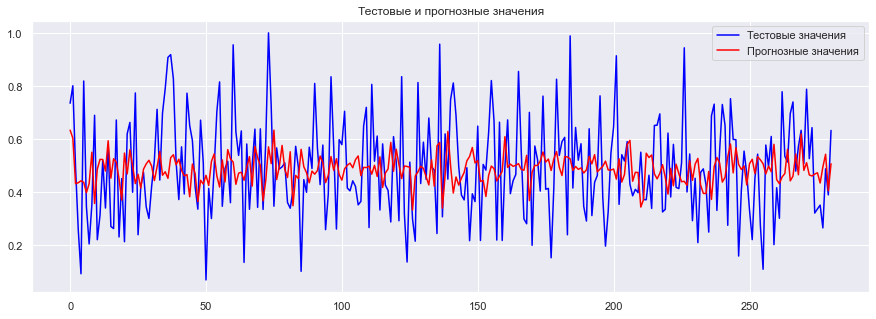

In [49]:
pred = model2.predict(np.array((X_test2)))
original = y_test2.values
predicted = pred
actual_and_predicted_plot(original, predicted)

In [50]:
model2.evaluate(X_test2, y_test2, verbose=0)

0.15991559624671936

In [51]:
np.mean(np.abs(y_test2-np.mean(y_test2)))

Соотношение матрица-наполнитель    0.152093
dtype: float64

In [52]:
#model2.save